In [22]:
#if you need to install scikit-maad
# !pip install scikit-maad

from maad import sound, util, rois
import matplotlib.pyplot as plt

import numpy as np
from scipy.io import wavfile
from scipy.signal import resample_poly

(array([0.78854456, 0.78821283, 0.78869997, ..., 0.73176862, 0.73172022,
        0.7301365 ], shape=(2118,)),
    peak_time  xcorrcoef    min_t    max_t  min_f       max_f
 0     6.3616   0.799937   5.6704   7.0528    0.0  19960.9375
 1    18.5344   0.795579  17.8432  19.2256    0.0  19960.9375
 2    22.8608   0.795248  22.1696  23.5520    0.0  19960.9375)

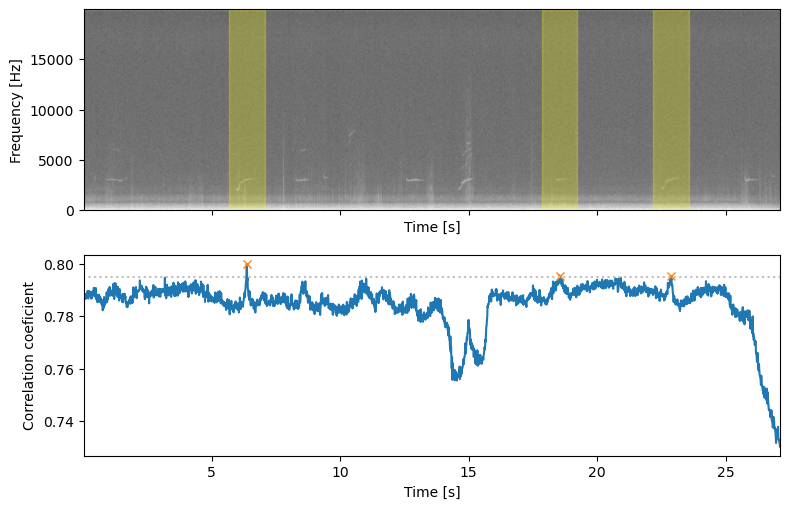

In [21]:
#BASIC SPECTROGRAM CROSS CORR

adj = 5

# load wav file and downsample
s, fs = sound.load("whistle_ex_2.wav")
#sample rate in fs_ds
fs_ds = 40000
s_ds = resample_poly(s, up=1, down=fs//fs_ds)
#s_filt = sound.select_bandwidth(s, fs, fcut=(7000, 15000), forder=5, ftype='bandpass')
Sxx_target, tn_target, fn_target, ext_target = sound.spectrogram(s_ds, fs_ds, nperseg=1024, noverlap=512)

Sxx_target_dB = util.power2dB(Sxx_target) + adj


s, fs = sound.load("whistle_template_2.wav")
fs_ds = 40000
s_ds = resample_poly(s, up=1, down=fs//fs_ds)
Sxx_template, tn_template, fn_template, ext_template = sound.spectrogram(s_ds, fs_ds, nperseg=1024, noverlap=512)

Sxx_template_dB = util.power2dB(Sxx_template) + adj


rois.template_matching(Sxx_target_dB, Sxx_template_dB, 
                       tn_target, ext_target, 
                       peak_th = 0.795,
                       display=True)

(array([0.06124538, 0.06683402, 0.05591342, ..., 0.06996542, 0.06999573,
        0.07585334], shape=(2118,)),
     peak_time  xcorrcoef    min_t    max_t  min_f       max_f
 0      1.0240   0.225904   0.3328   1.7152    0.0  19960.9375
 1      1.1520   0.228099   0.4608   1.8432    0.0  19960.9375
 2      1.2160   0.244819   0.5248   1.9072    0.0  19960.9375
 3      6.3488   0.334112   5.6576   7.0400    0.0  19960.9375
 4      6.4640   0.212536   5.7728   7.1552    0.0  19960.9375
 5      8.4608   0.218540   7.7696   9.1520    0.0  19960.9375
 6      8.4864   0.244695   7.7952   9.1776    0.0  19960.9375
 7      8.5248   0.248677   7.8336   9.2160    0.0  19960.9375
 8      8.5760   0.240595   7.8848   9.2672    0.0  19960.9375
 9      8.6016   0.239366   7.9104   9.2928    0.0  19960.9375
 10     8.6400   0.238063   7.9488   9.3312    0.0  19960.9375
 11    12.6976   0.210365  12.0064  13.3888    0.0  19960.9375
 12    12.7488   0.238716  12.0576  13.4400    0.0  19960.9375
 13    1

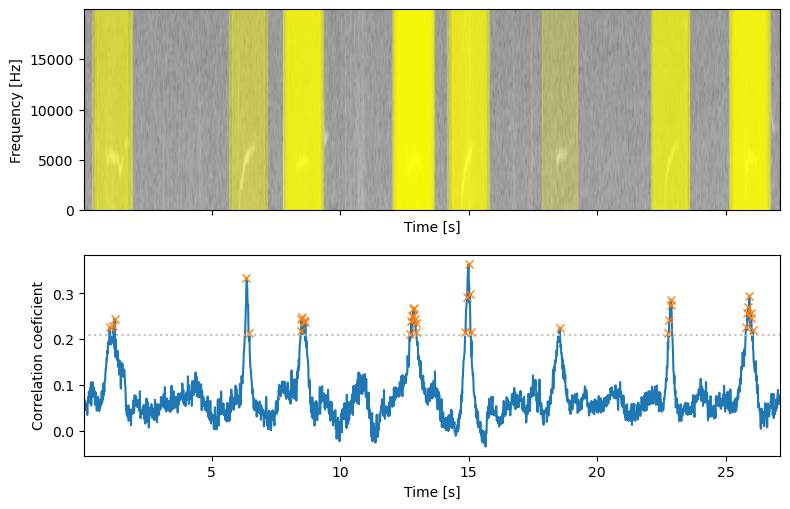

In [26]:
# Suppose Sxx_target, fn_target, etc. are already computed
freq_mask = (fn_target >= 2500) & (fn_target <= 4500)
Sxx_target_band = Sxx_target[freq_mask, :]
fn_target_band = fn_target[freq_mask]

Sxx_target_dB = util.power2dB(Sxx_target_band) + adj

# Similarly for template
Sxx_template_band = Sxx_template[freq_mask, :]
fn_template_band = fn_template[freq_mask]

Sxx_template_dB = util.power2dB(Sxx_template_band) + adj

# Run template matching
rois.template_matching(
    Sxx_target_dB, Sxx_template_dB,
    tn_target, ext_target,
    peak_th=0.21,
    display=True
)